<a href="https://colab.research.google.com/github/kumarVyu/Malaria_Detection/blob/main/malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from keras import layers, losses, optimizers, models

In [3]:
dataset, dataset_info= tfds.load("malaria", with_info=True,as_supervised =True, shuffle_files = True,split= 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/incomplete.C10MDE_1.0.0/malaria-train.tfrecord*...:   0%|         …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [4]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [5]:
def splits (dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
    DATASET_SIZE =len(dataset)

    train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

    val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
    val_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))

    test_dataset = val_test_dataset.skip(int(TEST_RATIO*DATASET_SIZE))
    return train_dataset, val_dataset, test_dataset

In [6]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

#dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset =splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()),
      list(val_dataset.take(1).as_numpy_iterator()),
      list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), np.int64(1))] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0,

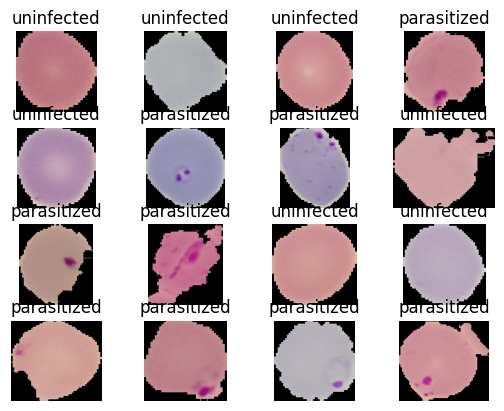

In [7]:
### ---->>> DATA VISUALIZATION

for i, (image,label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.title(dataset_info.features['label'].int2str(label))
    plt.axis('off')

In [8]:
IM_SIZE =224
def resizing(image,label):
    return tf.image.resize(image,(IM_SIZE,IM_SIZE)),label


In [9]:
BATCH_SIZE =32

train_dataset = train_dataset.map(resizing).shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

val_dataset = val_dataset.map(resizing).shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_dataset = test_dataset.map(resizing).shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [10]:
## ===>> Sequential API method

lenet_model = tf.keras.Sequential([
    layers.InputLayer(input_shape= (IM_SIZE, IM_SIZE, 3)),

    layers.Conv2D(filters =6, kernel_size =3, strides =1, padding='valid',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size =2, strides =2),

    layers.Conv2D(filters =16, kernel_size =3, strides =1, padding='valid',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size =2, strides =2),

    layers.Flatten(),

    layers.Dense(100, activation= 'relu'),
    layers.BatchNormalization(),

    layers.Dense(10, activation= 'relu'),
    layers.BatchNormalization(),

    layers.Dense(1, activation= 'sigmoid'),
])


lenet_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

In [11]:
IM_SIZE =224
feature_xtractor_seq= tf.keras.Sequential([
    layers.InputLayer(input_shape= (IM_SIZE, IM_SIZE, 3)),

    layers.Conv2D(filters =6, kernel_size =3, strides =1, padding='valid',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size =2, strides =2),

    layers.Conv2D(filters =16, kernel_size =3, strides =1, padding='valid',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size =2, strides =2),


])


feature_xtractor_seq.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,092 (4.27 KB)

 Non-trainable params: 44 (176.00 B)

In [12]:
## --->> FEATURE EXTRACTION MODEL

func_input = layers.Input(shape = (IM_SIZE, IM_SIZE, 3), name = "Input_Image")

x =    layers.Conv2D(filters =6, kernel_size =3, strides =1, padding='valid',activation='relu')(func_input)
x =    layers.BatchNormalization()(x)
x =    layers.MaxPool2D(pool_size =2, strides =2)(x)

x =    layers.Conv2D(filters =16, kernel_size =3, strides =1, padding='valid',activation='relu')(x)
x =    layers.BatchNormalization()(x)
output =    layers.MaxPool2D(pool_size =2, strides =2)(x)

feature_extraction_model = models.Model(func_input, output, name = 'Feature_extractor')
feature_extraction_model.summary()

Model: "Feature_extractor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,092 (4.27 KB)

 Non-trainable params: 44 (176.00 B)

In [20]:
## --->> Model subclassing

class FeatureExtractor(layers.Layer): ##---- >>>

  def __init__(self):
    super().__init__()

    self.conv_1 = layers.Conv2D(filters =6, kernel_size =3, strides =1, padding='valid',activation='relu')
    self.batch_1 =  layers.BatchNormalization()
    self.pool_1 =  layers.MaxPool2D(pool_size =2, strides =2)

    self.conv_2= layers.Conv2D(filters =16, kernel_size =3, strides =1, padding='valid',activation='relu')
    self.batch_2 =  layers.BatchNormalization()
    self.pool_2 =  layers.MaxPool2D(pool_size =2, strides =2)

  def call(self, x):

    x = self.conv_1(x)
    x = self.batch_1(x)
    x = self.pool_1(x)

    x = self.conv_2(x)
    x = self.batch_2(x)
    x = self.pool_2(x)

    return x
feature_sub_classed = FeatureExtractor()



In [26]:
class LenetModel(models.Model):
  def __init__(self):
    super(LenetModel,self).__init__()

    self.feature_extractor = FeatureExtractor()

    self.flatten = layers.Flatten()

    self.dense_1 = layers.Dense(100, activation = "relu")
    self.batch_1 = layers.BatchNormalization()

    self.dense_2 = layers.Dense(10, activation = "relu")
    self.batch_2 = layers.BatchNormalization()

    self.dense_3 = layers.Dense(1, activation = "sigmoid")

  def call(self,x):

    x = self.feature_extractor(x)
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.batch_1(x)
    x = self.dense_2(x)
    x = self.batch_2(x)
    x = self.dense_3(x)

    return x
lenet_sub_classed = LenetModel()
lenet_sub_classed(tf.zeros([1,224,224,3]))
lenet_sub_classed.summary()



Model: "lenet_model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ feature_extractor_9             │ ?                      │         1,136 │
│ (FeatureExtractor)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (1, 46656)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (1, 100)               │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (1, 100)               │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (1, 10)                │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (1, 10)                │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (1, 1)                 │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

In [21]:
## ---->>  A FUNCTIONAL api METHOD

func_input = layers.Input(shape = (IM_SIZE, IM_SIZE, 3), name = "Input_Image")

x =  feature_extraction_model(func_input)
# x = feature_sub_classed(func_input)
# x = feature_xtractor_seq(func_input)

# ( Callable Models )  -models in tensorflow act like functions or methods
## --->>>  WE CAN USE =   x = feature_xtractor_seq(func_input) and will return same result
## ---->>> feaure_sub_classed() will also give same result


x =    layers.Flatten()(x)

x =    layers.Dense(100, activation= 'relu')(x)
x =    layers.BatchNormalization()(x)

x =    layers.Dense(10, activation= 'relu')(x)
x =    layers.BatchNormalization()(x)

func_output =  layers.Dense(1, activation= 'sigmoid')(x)

lenet_model_func = models.Model(func_input, func_output, name= "lenet_Model")
lenet_model_func.summary()

Model: "lenet_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_extractor_4             │ (None, 54, 54, 16)     │         1,136 │
│ (FeatureExtractor)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

In [ ]:
lenet_model.compile(optimizer= optimizers.Adam(learning_rate =0.01),
              loss = losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
history = lenet_model.fit(train_dataset, validation_data = val_dataset, epochs =20, verbose =1)

Epoch 1/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 48s 58ms/step - accuracy: 0.8380 - loss: 0.3759 - val_accuracy: 0.8762 - val_loss: 0.3614
Epoch 2/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 72s 52ms/step - accuracy: 0.9284 - loss: 0.2051 - val_accuracy: 0.8722 - val_loss: 0.5056
Epoch 3/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.9427 - loss: 0.1802 - val_accuracy: 0.7644 - val_loss: 0.4131
Epoch 4/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9462 - loss: 0.1640 - val_accuracy: 0.5416 - val_loss: 1.3686
Epoch 5/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.9488 - loss: 0.1574 - val_accuracy: 0.9361 - val_loss: 0.1997
Epoch 6/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.9547 - loss: 0.1369 - val_accuracy: 0.9024 - val_loss: 0.5615
Epoch 7/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.9590 - loss: 0.1270 - val_accuracy: 0.9459 - val_loss: 0.1696
Epoch 8/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.9608 - loss: 0.1163 - 

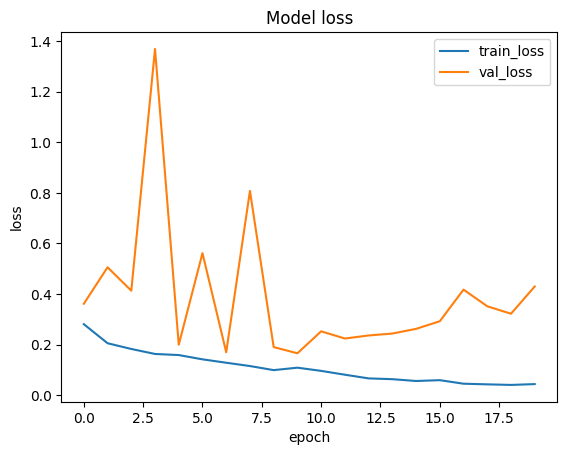

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

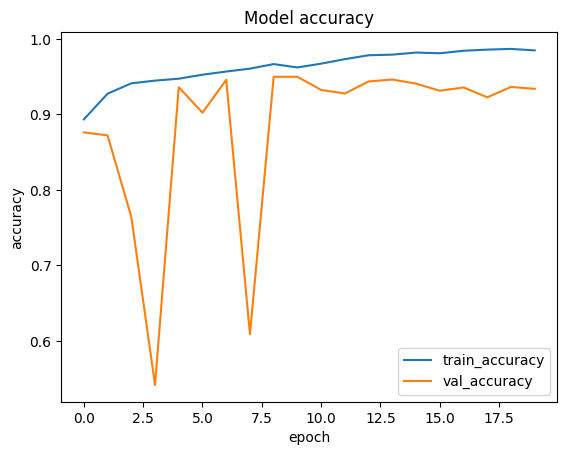

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [ ]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
### ---> MODEL EVALUATION AND TESTING

lenet_model.evaluate(test_dataset)

87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9271 - loss: 0.4646


[0.4766867756843567, 0.9281827807426453]

In [ ]:
def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

In [ ]:
lenet_model.predict(test_dataset.take(1))[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


np.float32(0.0004925245)

In [ ]:
parasite_or_not(lenet_model.predict(test_dataset.take(1))[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


'P'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


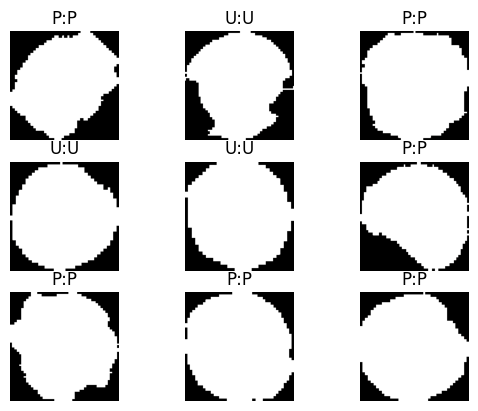

In [ ]:
for i, (image, label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(lenet_model.predict(image)[0][0])))

  plt.axis('off')

In [ ]:
### ---->> MODEL SAVING THEIR CONFIGURATION AND WEIGHTS
lenet_model.save("malaria_model.h5")
from google.colab import drive
drive.mount('/content/drive/')
lenet_model.save("/content/googleCOLAB/malariaDATASET_MODEL/malaria_model.h5")

Mounted at /content/drive/
